In [1]:
from NeuralNet import NeuralNet
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler

### 1. Load the data

In [2]:
#load the data
df_train= pd.read_csv("Data/ParisHousing_train_data.csv")
df_test= pd.read_csv("Data/ParisHousing_test_data.csv")
#df_val= pd.read_csv("Data/ParisHousing_val_data.csv")


#split
df_train_x =df_train.drop(columns=['price'])  
df_train_y=df_train['price'] 

df_test_x= df_test.drop(columns=['price'])  
df_test_y = df_test['price'] 


#df_val_x= df_val.drop(columns=['price'])  
#df_val_y= df_val['price'] 

### 2. Preprocesing

In [3]:
y_train = df_train_y.values.reshape(-1, 1)
y_test = df_test_y.values.reshape(-1, 1)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y_train.reshape(-1, 1))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train_x)
X_test_scaled = scaler.transform(df_test_x)

In [4]:
y

array([[0.05795507],
       [0.05513524],
       [0.65377765],
       ...,
       [0.39620874],
       [0.4496425 ],
       [0.10744468]])

### 3. Training

In [5]:
# Definir la arquitectura de la red neuronal
layers = [X_train_scaled.shape[1], 64,32, 1]  # Ejemplo: entrada -> 2 capas ocultas -> salida
activation = "relu"  # Activación en capas ocultas
learning_rate = 0.01
momentum = 0.9
validation_split = 0.2  # 20% para validación

# Inicializar la red neuronal
nn = NeuralNet(layers, activation=activation, lr=learning_rate, momentum=momentum, validation_split=validation_split, l2=0, dropout_rate=0.1)

# Entrenar el modelo
epochs = 1000
nn.fit(X_train_scaled, y, epochs=epochs)

# Obtener la evolución del error
losses = nn.loss_epochs()


Predicciones iniciales (antes del entrenamiento):
Entrada: [ 1.49532648 -1.15289632 -1.01511421 -1.00652126 -0.32330793  0.79495689
 -0.17387851 -0.53151793 -1.24767258  1.00425907 -1.00175153  1.35326427
  0.13460348  0.98787199  0.99178375 -1.57710692], Predicción inicial: [0.01042024], Real: [0.92642056]
Entrada: [ 0.26173936 -0.59522807  0.98511083  0.99352099  1.2688944  -0.55381588
 -1.56664751 -0.17946101 -0.81713445  1.00425907 -1.00175153 -0.65680566
  0.74659146  0.28591188  0.99178375 -1.26133029], Predicción inicial: [0.00516416], Real: [0.57383882]
Entrada: [ 1.73966167 -1.32716764  0.98511083 -1.00652126  0.92276346 -1.09941957
 -0.17387851  0.87670975 -0.38659633 -0.99575899  0.99825153 -0.34145295
 -0.73666053  0.88486698  0.99178375  0.31755288], Predicción inicial: [-0.0273826], Real: [0.99702062]
Entrada: [-1.49677547 -0.52551954  0.98511083  0.99352099 -1.05018291  0.99088388
 -1.56664751  1.58082358 -1.14003805 -0.99575899  0.99825153  0.87069484
 -1.35140676 -1.28

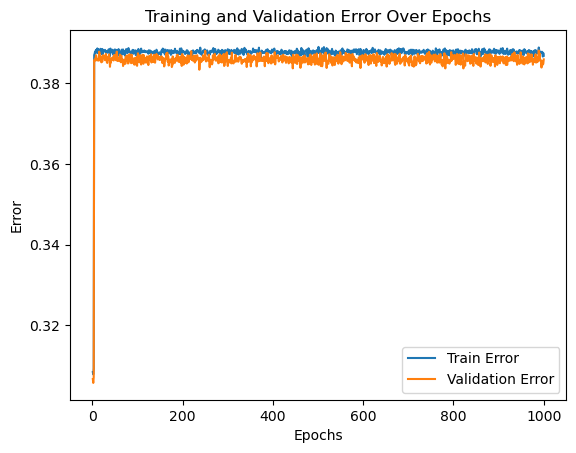

In [6]:
# Graficar la evolución de los errores
import matplotlib.pyplot as plt
plt.plot(range(1, epochs + 1), losses[:, 0], label="Train Error")
if validation_split > 0:
    plt.plot(range(1, epochs + 1), losses[:, 1], label="Validation Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Validation Error Over Epochs")
plt.show()



In [7]:
# Realizar predicciones en los datos de prueba
y_pred = nn.predict(X_test_scaled).flatten()

# Comparar las predicciones con los valores reales
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

mae_test = mean_absolute_error(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MAE (Mean Absolute Error):", mae_test)
print("MAPE (Mean Absolute Percentage Error):", mape_test, "%")

Mean Squared Error on Test Data: 33508775896314.33
MAE (Mean Absolute Error): 4989854.570522353
MAPE (Mean Absolute Percentage Error): 100.00002740822134 %


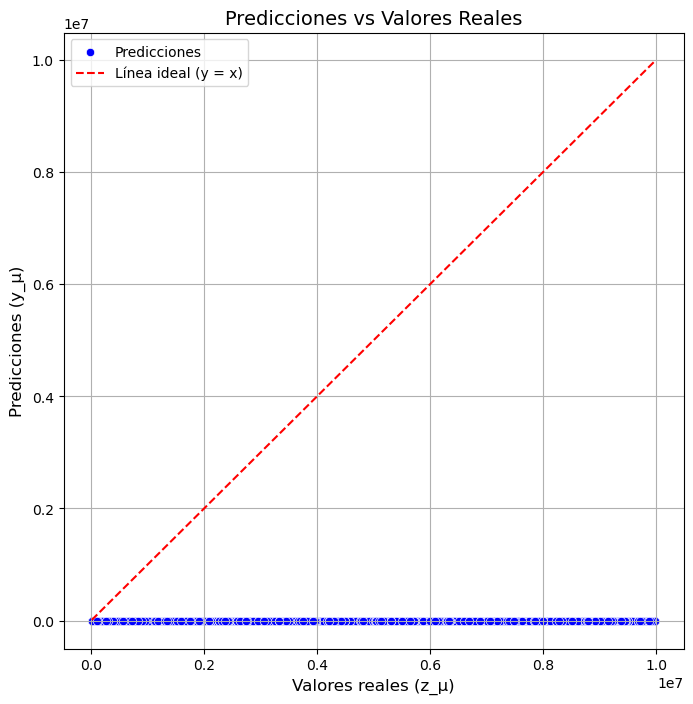

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de dispersión
y_test = np.array(y_test).flatten()  
y_pred = np.array(y_pred).flatten() 

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicciones')

# Agregar la línea ideal (y = x)
min_value = min(min(y_test), min(y_test))
max_value = max(max(y_test), max(y_test))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Línea ideal (y = x)')

# Configurar etiquetas y título
plt.title("Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores reales (z_μ)", fontsize=12)
plt.ylabel("Predicciones (y_μ)", fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [9]:
y_pred


array([-0.2871329 , -0.28647725, -0.28711747, ..., -0.25294596,
       -0.2137402 , -0.26337878])

In [10]:
y_test

array([3282188.1, 7704215.5, 9385146.9, ..., 9877813.4, 3329395.8,
       4204881. ])

In [11]:
# Cross validation
# Realizar cross-validation
results = nn.cross_validate(X_train_scaled, y_train, k=5, epochs=100)

# Visualizar resultados
print("Cross-validation metrics:")
print(results)


=== Fold 1/5 ===
Predicciones iniciales (antes del entrenamiento):
Entrada: [ 0.59923281 -0.45581101  0.98511083 -1.00652126 -1.1540222   1.35905209
  0.17431375 -1.23563177  0.90501805  1.00425907 -1.00175153 -0.31335222
  1.40546978 -1.35072338  0.99178375  0.94910614], Predicción inicial: [0.11325839], Real: [6710309.4]
Entrada: [ 1.51432838  0.34583709  0.98511083  0.99352099  1.23428131 -1.67927066
  0.87069825 -1.23563177 -0.06369273 -0.99575899  0.99825153 -0.5870742
 -1.10316375 -0.67165327  0.99178375 -1.26133029], Predicción inicial: [0.11452754], Real: [9336064.5]
Entrada: [ 0.23320157  1.39146505  0.98511083  0.99352099  0.95737656 -0.00845459
  1.2188905  -1.58768869 -1.67821071 -0.99575899 -1.00175153  1.53331714
 -0.01606624  1.31977704  0.99178375 -1.26133029], Predicción inicial: [-0.01321297], Real: [5668603.]
Entrada: [-0.53131087  0.65952548  0.98511083  0.99352099 -1.32708767 -1.13176241
  0.87069825  0.52465283 -0.38659633 -0.99575899  0.99825153 -0.5350358
  0.8